In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

In [24]:
nursery = pd.read_csv('nursery.csv')

In [25]:
nursery.head()

,parents,has_nurs,form,children,housing,finance,social,health,class values
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


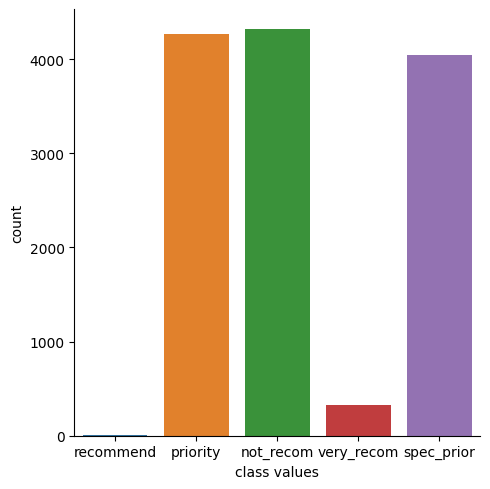

In [26]:
sns.catplot(x = 'class values', data= nursery, kind='count')

In [28]:
class_values_t = pd.get_dummies(nursery, columns=['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health'])
class_values_t.head()

,class values,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,recommend,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,priority,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
2,not_recom,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
3,recommend,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
4,priority,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0


In [29]:
class_values_t['class values'].replace(['not_recom', 'recommend', 'very_recom', 'priority', 'spec_prior'], [0, 1, 2, 3, 4], inplace=True)
class_values_t.head()

,class values,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,3,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
2,0,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
3,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
4,3,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0


In [40]:
class_values_t.columns

Index(['class values', 'parents_great_pret', 'parents_pretentious',
       'parents_usual', 'has_nurs_critical', 'has_nurs_improper',
       'has_nurs_less_proper', 'has_nurs_proper', 'has_nurs_very_crit',
       'form_complete', 'form_completed', 'form_foster', 'form_incomplete',
       'children_1', 'children_2', 'children_3', 'children_more',
       'housing_convenient', 'housing_critical', 'housing_less_conv',
       'finance_convenient', 'finance_inconv', 'social_nonprob',
       'social_problematic', 'social_slightly_prob', 'health_not_recom',
       'health_priority', 'health_recommended'],
      dtype='object')

In [30]:
X = class_values_t.loc[:, class_values_t.columns != 'class values']
Y = class_values_t[['class values']]
X.shape, Y.shape

((12960, 27), (12960, 1))

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
X_test

,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,form_completed,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
6407,0,1,0,0,1,0,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
6301,0,1,0,0,1,0,0,0,0,1,...,1,0,1,0,1,0,0,0,1,0
304,0,0,1,0,0,0,1,0,0,1,...,0,1,0,1,0,1,0,0,1,0
12520,1,0,0,0,0,0,0,1,0,1,...,1,0,0,1,1,0,0,0,1,0
2417,0,0,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7514,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4874,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2372,0,0,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0
8106,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1


In [35]:
model = RandomForestClassifier()
model.fit(X_train, Y_train.values.ravel())
pred = model.predict(X_test)
accuracy_score(Y_test, pred)

0.9907407407407407

In [37]:
input_data = (0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1)
input_data_as_array = np.asarray(input_data)
input_data_reshaped = input_data_as_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0] == 0):
    print('not_recom')
elif(prediction[0] == 1):
    print('recommend')
elif(prediction[0] == 2):
    print('very_recom')
elif(prediction[0] == 3):
    print('priority')
else:
    print('spec_prior')

[0]
not_recom


c:\Users\Somar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [38]:
file_name = 'model.sav'
pickle.dump(model, open(file_name, 'wb'))

In [39]:
loaded_model = pickle.load(open(file_name, 'rb'))
loaded_model.score(X_test, Y_test) * 100

99.07407407407408